In [382]:
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [244]:
bloodtrain = pd.read_csv('trainblood.csv')

In [245]:
bloodtrain.head()
bloodtrain.columns

Index([u'Unnamed: 0', u'Months since Last Donation', u'Number of Donations',
       u'Total Volume Donated (c.c.)', u'Months since First Donation',
       u'Made Donation in March 2007'],
      dtype='object')

In [246]:
bloodtrain.set_index('Unnamed: 0', inplace = True)

In [247]:
bloodtrain.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Unnamed: 0,,,,,
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [248]:
bloodtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 619 to 74
Data columns (total 5 columns):
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(5)
memory usage: 27.0 KB


### Univariate Analysis 

In [249]:
bloodtrain.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


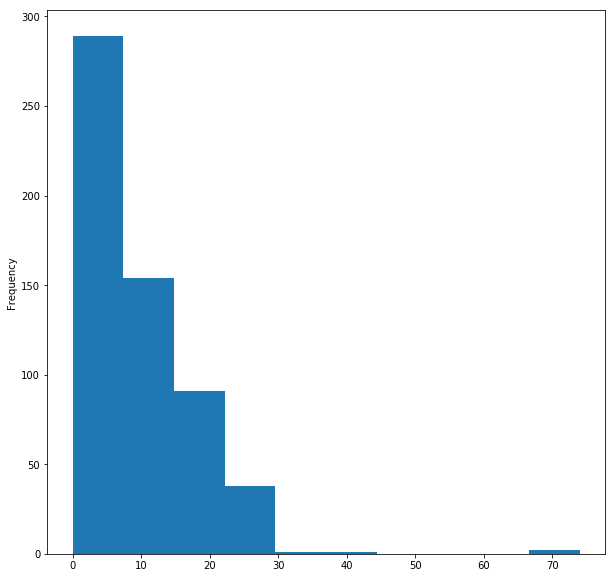

In [250]:
bloodtrain['Months since Last Donation'].plot(kind='hist', figsize = (10,10))

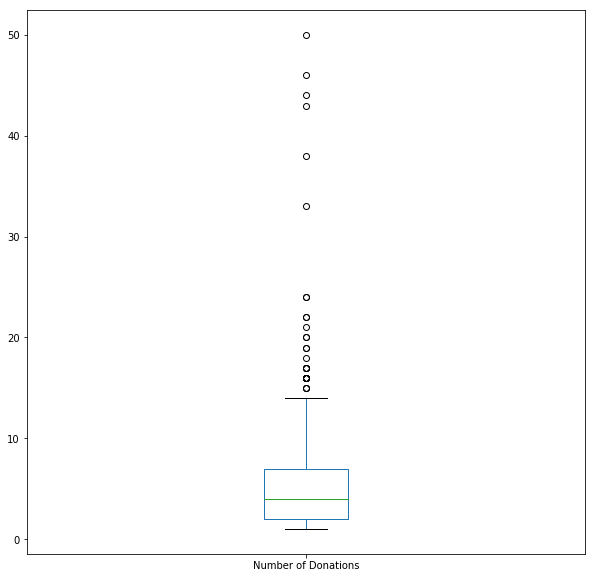

In [251]:
bloodtrain['Number of Donations'].plot(kind = 'box', figsize = (10,10))

In [298]:
bloodtrain.drop(bloodtrain[bloodtrain['Months since Last Donation']>=70].index,inplace = True)

In [252]:
bloodtrain.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Unnamed: 0,,,,,
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


### Bivariate Analysis

In [253]:
bloodtrain.corr()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.261234,0.220615,0.220615,-0.019819,1.000000


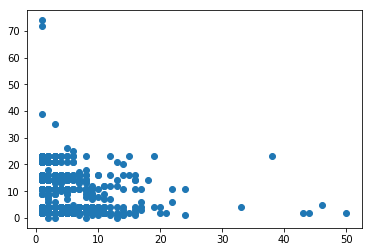

In [254]:
plt.scatter('Number of Donations','Months since Last Donation',data = bloodtrain)

In [255]:
stat,p = ttest_ind(bloodtrain['Months since First Donation'],bloodtrain['Made Donation in March 2007'])

In [256]:
print p

3.572379308560336e-172


In [257]:
stat

33.487832865832274

### Splitting the data

In [299]:
train = bloodtrain.drop(['Made Donation in March 2007'], axis = 1)
label = bloodtrain['Made Donation in March 2007']

In [300]:
print train.head()
print label.head()

            Months since Last Donation  Number of Donations  \
Unnamed: 0                                                    
619                                  2                   50   
664                                  0                   13   
441                                  1                   16   
160                                  2                   20   
358                                  1                   24   

            Total Volume Donated (c.c.)  Months since First Donation  
Unnamed: 0                                                            
619                               12500                           98  
664                                3250                           28  
441                                4000                           35  
160                                5000                           45  
358                                6000                           77  
Unnamed: 0
619    1
664    1
441    1
160    1
358    0
Name:

In [430]:
data_train,data_test,label_train,label_test = train_test_split(train,label,test_size = 0.25,random_state = 0)

##### rfe estimator

In [431]:
estimator = tree.DecisionTreeClassifier()

In [432]:
so = RFE(estimator,1,step=1)

In [433]:
so.fit(data_train,label_train)

RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
  n_features_to_select=1, step=1, verbose=0)

In [434]:
so.ranking_

array([2, 4, 3, 1])

In [435]:
data_train2 = data_train.drop(['Number of Donations'],axis=1)
data_test2 = data_test.drop(['Number of Donations'],axis=1)

### Model 

##### Logistic Regression

In [436]:
kf = KFold(n_splits = 5,random_state = None)
train1 = train.reset_index()
train1.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,619,2,50,12500,98
1,664,0,13,3250,28
2,441,1,16,4000,35
3,160,2,20,5000,45
4,358,1,24,6000,77


In [437]:
train1.drop('Unnamed: 0', axis = 1, inplace = True) 
train1.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [438]:
label1 = label.reset_index()
label1.drop('Unnamed: 0', axis = 1, inplace = True)
label1.head()

,Made Donation in March 2007
0,1
1,1
2,1
3,1
4,0


In [439]:
clf = LogisticRegression()

In [441]:
clf.fit(data_train,label_train)
pred = clf.predict(data_train)
pred1 = clf.predict(data_test)
print clf.score(data_test,label_test)
print clf.score(data_train,label_train)

0.7916666666666666
0.7627906976744186


In [442]:
print classification_report(label_test,pred1)

             precision    recall  f1-score   support

          0       0.79      0.99      0.88       111
          1       0.80      0.12      0.21        33

avg / total       0.79      0.79      0.73       144



##### After feature_scaling and model_selection

In [365]:
clf = LogisticRegression()

In [416]:
clf.fit(data_train2,label_train)
pred4 = clf.predict(data_train2)
pred5 = clf.predict(data_test2)
print clf.score(data_test2,label_test)
print clf.score(data_train2,label_train)

0.7569444444444444
0.7604651162790698


In [417]:
print classification_report(label_test,pred5)

             precision    recall  f1-score   support

          0       0.76      1.00      0.86       109
          1       0.00      0.00      0.00        35

avg / total       0.57      0.76      0.65       144



##### Decision Tree

In [418]:
clf1 = tree.DecisionTreeClassifier()
clf1.fit(data_train,label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [419]:
print clf1.score(data_train,label_train)
print clf1.score(data_test,label_test)

0.9465116279069767
0.6944444444444444


In [420]:
pred2 = clf1.predict(data_train)
pred3 = clf1.predict(data_test)

In [421]:
print classification_report(label_train, pred2)

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       327
          1       0.97      0.81      0.88       103

avg / total       0.95      0.95      0.94       430



In [422]:
print classification_report(label_test,pred3)

             precision    recall  f1-score   support

          0       0.78      0.83      0.80       109
          1       0.34      0.29      0.31        35

avg / total       0.68      0.69      0.68       144



##### After feature_scaling and model_selection

In [423]:
clf1 = tree.DecisionTreeClassifier()
clf1.fit(data_train2,label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [424]:
print clf1.score(data_train2,label_train)
print clf1.score(data_test2,label_test)

0.9209302325581395
0.6944444444444444


In [425]:
pred6 = clf1.predict(data_train2)
pred7 = clf1.predict(data_test2)

In [426]:
print classification_report(label_train, pred6)
print classification_report(label_test,pred7)

             precision    recall  f1-score   support

          0       0.91      0.99      0.95       327
          1       0.96      0.70      0.81       103

avg / total       0.92      0.92      0.92       430

             precision    recall  f1-score   support

          0       0.76      0.87      0.81       109
          1       0.26      0.14      0.19        35

avg / total       0.64      0.69      0.66       144



##### Random Forest

In [427]:
clf2 = RandomForestClassifier(n_estimators = 100, min_samples_split = 5,random_state = 0)

In [428]:
clf2.fit(data_train2,label_train)
pred8 = clf2.predict(data_train2)
pred9 = clf2.predict(data_test2)
print clf2.score(data_train2,label_train)
print clf2.score(data_test2,label_test)

0.8558139534883721
0.7291666666666666


In [429]:
print classification_report(label_train, pred8)
print classification_report(label_test,pred9)

             precision    recall  f1-score   support

          0       0.85      0.99      0.91       327
          1       0.92      0.44      0.59       103

avg / total       0.86      0.86      0.84       430

             precision    recall  f1-score   support

          0       0.76      0.94      0.84       109
          1       0.30      0.09      0.13        35

avg / total       0.65      0.73      0.67       144



### putting together in a file

In [443]:
bloodtest = pd.read_csv('testblood.csv', index_col = 'Unnamed: 0')
bloodtest.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
659,2,12,3000,52
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34


In [327]:
bloodtest1 = bloodtest.drop(['Number of Donations'],axis=1)

In [444]:
proba =  clf.predict_proba(bloodtest)
probability = clf.predict_proba(bloodtest)[:,1]

In [445]:
np.savetxt("foo.csv", probability, delimiter=",")